In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
D = 3
N = 1e8


s = 1.0
sc = 1.0
c = s / sc
L = 1.0

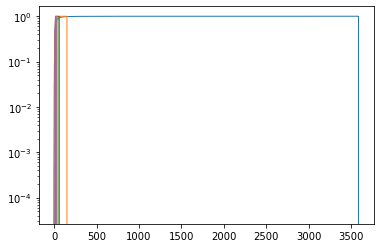

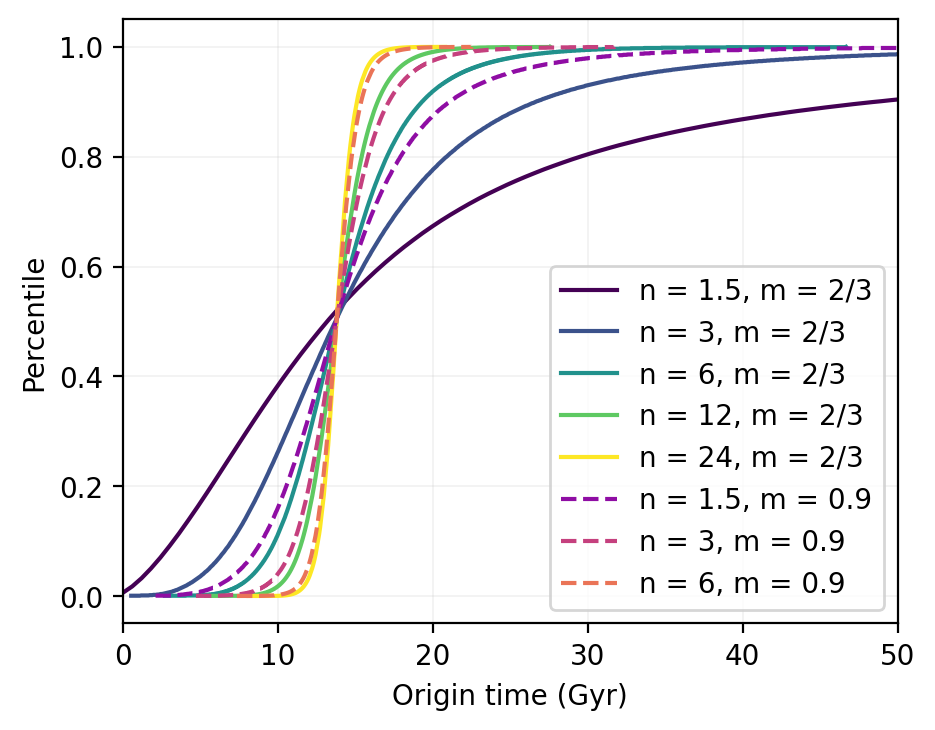

In [5]:
plot_data = {}
cmap1 = plt.get_cmap('viridis')
cmap2 = plt.get_cmap('plasma')
mycols = []

m = 2/3
true_nlist = [1.5, 3, 6, 12, 24]
nlist = [round(tnn/(1-m)-1, 4) for tnn in true_nlist]
mycols.append(cmap1(np.linspace(0, 1, len(nlist))))
num_empty = 100
res_dir = 'nsc-setisaturday-numempty100'
randix = 0
for nix, n in enumerate(nlist):
    fout = (
        f"{res_dir}/D={D}_n={float(n)}_N={N:.2e}_"
        f"s={s:.1f}_L={L:.1f}_c={c:.5e}_r={randix}"
    )
    true_n = true_nlist[nix]
    res = pd.read_csv(fout+'.csv')
    res_years = pd.read_csv(fout+'_years.csv')
    (counts, bins, patches) = plt.hist(
        res_years.OriginTime, cumulative=True, histtype='step', density=True, log=True, bins=res.shape[0])
    plot_data[(true_n, m)] = (bins[0:-1], counts)

m = 0.90
true_nlist = [1.5, 3, 6]
nlist = [round(tnn/(1-m)-1, 6) for tnn in true_nlist]
mycols.append(cmap2(np.linspace(0.3, 1, len(nlist)+2)))
res_dir = 'nsc-m90-numempty0'
randix = 0
for nix, n in enumerate(nlist):
    fout = (
        f"{res_dir}/D={D}_n={float(n):.5f}_N={N:.2e}_"
        f"s={s:.1f}_L={L:.1f}_c={c:.5e}_r={randix}"
    )
    true_n = true_nlist[nix]
    res = pd.read_csv(fout+'.csv')
    res_years = pd.read_csv(fout+'_years.csv')
    (counts, bins, patches) = plt.hist(
        res_years.OriginTime, cumulative=True, histtype='step', density=True, log=True, bins=res.shape[0])
    plot_data[(true_n, m)] = (bins[0:-1], counts)    
    
fig = plt.figure(figsize=(5,4), dpi=200)
leg = []
mlabels = ['2/3', '0.9']
linestyles = ['-', '--']
for mix, m in enumerate([2/3, 0.90]):
    if mix < 0.8:
        true_nlist = [1.5, 3, 6, 12, 24]
    else:
        true_nlist = [1.5, 3, 6]
    for nix, true_n in enumerate(true_nlist):
        (bins, counts) = plot_data[(true_n, m)]
        plt.plot(bins, counts, linestyles[mix], color=mycols[mix][nix])
        leg.append(f'n = {true_n}, m = {mlabels[mix]}')
plt.gca().set_xlim(1, 50)
plt.gca().set_ylabel('Percentile')
plt.gca().set_xlabel('Origin time (Gyr)');
#plt.gca().set_title(f'D={D} N={N:.2e} s/c={s/c:.2f} L={L:.1f}');
plt.gca().set_xticks([0, 10, 20, 30, 40, 50])
plt.gca().set_xticklabels([0, 10, 20, 30, 40, 50])
plt.legend(leg);
plt.grid(linewidth=0.1);
fig.savefig('figures-friday/plotAm.png', dpi=200);
#fig.savefig('figures-final/plotAm.pdf', dpi=200);